In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
import scipy.stats
from tqdm import tqdm

In [4]:
from tools import HelperTorch
from domain import Flower, Polygon, Heart, Cross, Star

In [5]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

## My Domains

In [56]:
noise_scale = 0.03

In [57]:
x = np.linspace(0.5, np.pi-0.5, 1000)
smile = np.stack([np.cos(x), -np.sin(x)-0.2*x], axis=1) * 1.5
smile += 2 * noise_scale * np.random.normal(size=smile.shape)
smile = smile.transpose()

In [58]:
leye = np.random.normal(size=smile.shape) / 7
leye[0, :] -= 1.2
leye[1, :] += 0.7

leyeBall = Flower(petals=1, move_out=1).position(np.arange(0, 1, 0.001)) * 2
leyeBall += noise_scale * np.random.normal(size=leyeBall.shape)
leyeBall[0, :] -= 1.4
leyeBall[1, :] += 0.35

In [59]:
reye = np.random.normal(size=smile.shape) / 7
reye[0, :] += 1.6
reye[1, :] += 0.7

reyeBall = Flower(petals=1, move_out=1).position(np.arange(0, 1, 0.001)) * 2
reyeBall += noise_scale * np.random.normal(size=reyeBall.shape)
reyeBall[0, :] += 1.4
reyeBall[1, :] += 0.35

In [60]:
myStar = Star()
points = myStar.position(np.arange(0, 1, 0.001)) * 7

In [61]:
all_points = np.concatenate([smile, leyeBall, leye, reye, reyeBall], axis=1)

No handles with labels found to put in legend.


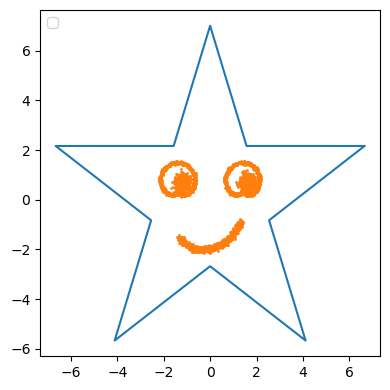

In [62]:
fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :])
plt.plot(all_points[0, :], all_points[1, :], 'o', markersize=1)
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [ ]:
def save_toy_path_paper(xt, num_snapshot=None):
    import seaborn
    from scipy import stats
    lims = [-0.1, 1.1]
    
    num_row = 1
    num_col = np.ceil(num_snapshot/num_row).astype(int)
    total_steps = xt.shape[1]
    sample_steps = np.linspace(0, total_steps-1, num_snapshot).astype(int)
    plt.style.use('default')
    fig, axes = plt.subplots(num_row, num_col, figsize=[num_col*2.5, num_row*2.5])
    plt.subplots_adjust(hspace=0.0, wspace=0.0)
    fig.patch.set_facecolor('lightgrey')
    axes = axes.reshape(-1)
    
    for ax, step in zip(axes, sample_steps):
        x, y = xt[:, step, 0], xt[:, step, 1]
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)(values)
        
        ax = fig.add_subplot(ax)
        cmap = 'viridis'
        seaborn.scatterplot(x=x, y=y, s=8, c=kernel, vmin=-0.002, cmap=cmap, alpha=0.5)
        
        ax.set_xlim(*lims)
        ax.set_ylim(*lims)
        ax.axis('off')
    plt.axis('off')
    

In [ ]:
import torch
import numpy as np
Xt = torch.rand(1000, 100, 2).numpy() * 8


In [ ]:
save_toy_path_paper(Xt, 5)

In [ ]:
myFlower = Flower(radius=7)
myDomainCurve = myFlower.position(np.arange(0, 1, 0.001))
#myDomainCurve = get_domain(opt)(radius=opt.domain_radius).position(np.arange(0, 1, 0.001))

In [ ]:
import seaborn
from scipy import stats
lims = [-0.1, 1.1]

xt = Xt
num_snapshot = 5
num_row = 1
num_col = np.ceil(num_snapshot/num_row).astype(int)


total_steps = xt.shape[1]
sample_steps = np.linspace(0, total_steps-1, num_snapshot).astype(int)
plt.style.use('default')
fig, axes = plt.subplots(num_row, num_col, figsize=[num_col*2.5, num_row*2.5])
plt.subplots_adjust(hspace=0.0, wspace=0.02)
#fig.patch.set_facecolor('lightgrey')
axes = axes.reshape(-1)

for ax, step in zip(axes, sample_steps):
    x, y = xt[:, step, 0], xt[:, step, 1]
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)(values)

    ax = fig.add_subplot(ax)
    cmap = 'salmon'
    #seaborn.scatterplot(x=x, y=y, s=8, c=kernel, vmin=-0.002, cmap=cmap, palette='red', alpha=0.5)
    seaborn.scatterplot(x=myDomainCurve[0, :], y=myDomainCurve[1, :], color='darkgreen', s=4, alpha=0.1)
    #ax.set_xlim(*lims)
    #ax.set_ylim(*lims)
    #ax.axis('off')
    
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.setp(ax.spines.values(), color='lightgrey', alpha=0.4)
    #plt.axis('off')

In [ ]:
plt.show()

In [ ]:
Yt = torch.rand(2, 2000).numpy()